In [1]:
#importing libraies
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading files
data = pd.read_csv("data.csv")
#print(data)

In [3]:
#summary
print(data.dtypes)
print()
print(data.describe())

Date/Time                         object
LV ActivePower (kW)              float64
Wind Speed (m/s)                 float64
Theoretical_Power_Curve (KWh)    float64
Wind Direction (°)               float64
dtype: object

       LV ActivePower (kW)  Wind Speed (m/s)  Theoretical_Power_Curve (KWh)  \
count         50530.000000      50530.000000                   50530.000000   
mean           1307.684332          7.557952                    1492.175463   
std            1312.459242          4.227166                    1368.018238   
min              -2.471405          0.000000                       0.000000   
25%              50.677890          4.201395                     161.328167   
50%             825.838074          7.104594                    1063.776283   
75%            2482.507568         10.300020                    2964.972462   
max            3618.732910         25.206011                    3600.000000   

       Wind Direction (°)  
count        50530.000000  
mean        

# Data Cleaning

In [4]:
#renaming columns
data = data.rename({'Date/Time':'Date_Time','LV ActivePower (kW)':'ActivePower','Wind Speed (m/s)':'WindSpeed','Theoretical_Power_Curve (KWh)':'TheoreticalPower','Wind Direction (°)':'WindDirection'},axis=1)
print(data.dtypes)

Date_Time            object
ActivePower         float64
WindSpeed           float64
TheoreticalPower    float64
WindDirection       float64
dtype: object


In [5]:
#checking for NULL Values
print("No of NULL values")
#Date_Time Column
na_values = data['Date_Time'].isnull()
l = len(data[na_values])
print("Date/Time ",l)
#Active Power Column
na_values = data['ActivePower'].isnull()
l = len(data[na_values])
print("Active Power ",l)
#Wind Speed
na_values = data['WindSpeed'].isnull()
l = len(data[na_values])
print("Wind Speed ",l)
#Theoretical power
na_values = data['TheoreticalPower'].isnull()
l = len(data[na_values])
print("Theoretical Power ",l)
#Wind Direction
na_values = data['WindDirection'].isnull()
l = len(data[na_values])
print("Wind Direction ",l)

No of NULL values
Date/Time  0
Active Power  0
Wind Speed  0
Theoretical Power  0
Wind Direction  0


In [6]:
#formatting Date/Time Column
print(type(data['Date_Time'][1]))
data['DT'] = 0
for i in range(0,len(data['Date_Time'])):
    data['DT'][i] = i
print(type(data['DT'][0]))

<class 'str'>
<class 'numpy.int64'>


In [7]:
#Rounding the column values
print(type(data['WindSpeed'][0]))
data['WindSpeed'] = data['WindSpeed'].round()
print(data['WindSpeed'])
data['ActivePower'] = data['ActivePower'].round()
data['TheoreticalPower'] = data['TheoreticalPower'].round()
data['WindDirection'] = data['WindDirection'].round()

<class 'numpy.float64'>
0         5.0
1         6.0
2         5.0
3         6.0
4         6.0
         ... 
50525    11.0
50526     7.0
50527     8.0
50528     9.0
50529    10.0
Name: WindSpeed, Length: 50530, dtype: float64


In [8]:
#converting float to int
for i in range(0,len(data['DT'])):
    data['WindSpeed'][i] = int(data['WindSpeed'][i])
    data['WindDirection'][i] = int(data['WindDirection'][i])
    data['ActivePower'][i] = int(data['ActivePower'][i])
    data['TheoreticalPower'][i] = int(data['TheoreticalPower'][i])

In [9]:
#checking for duplicate values
boolean = data.duplicated().any()
print(boolean)

False


In [10]:
#changing date_time data to month wise.
print(data['Date_Time'][0])
print(data['Date_Time'][0][3])
data['Month'] = 0
for i in range(len(data['Date_Time'])):
    if data['Date_Time'][0][3] == 0:
        data['Month'][i] = int(data['Date_Time'][i][4])
    else:
        data['Month'][i] = int(data['Date_Time'][i][3]) * 10 + int(data['Date_Time'][i][4])
print(data['Month'].unique())
                        

01 01 2018 00:00
0
[ 1  2  3  4  5  6  7  8  9 10 11 12]


# Data Analysis

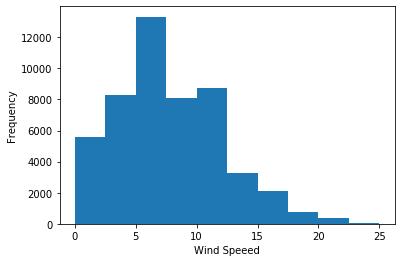

In [11]:
fig = plt.figure()
plt.hist(data['WindSpeed'])
plt.xlabel("Wind Speeed")
plt.ylabel("Frequency")
plt.show()
fig.savefig("Analysis_Images/WindSpeed.png")
#wind speed mostly resides between 3-12

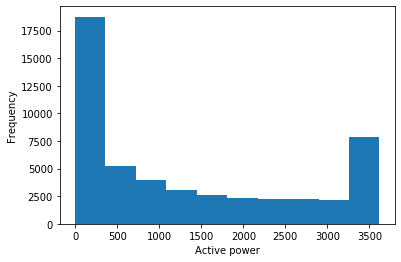

In [12]:
fig = plt.figure()
plt.hist(data['ActivePower'])
plt.xlabel("Active power")
plt.ylabel("Frequency")
plt.show()
fig.savefig("Analysis_Images/Activepower.png")
#Mostly low amount of power produced.

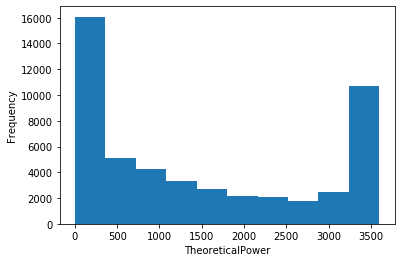

In [13]:
plt.hist(data['TheoreticalPower'])
plt.xlabel("TheoreticalPower")
plt.ylabel("Frequency")
plt.show()

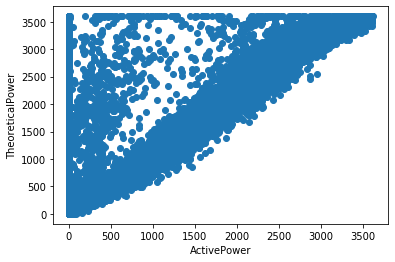

In [14]:
fig = plt.figure()
plt.scatter(data['ActivePower'],data['TheoreticalPower'])
plt.xlabel("ActivePower")
plt.ylabel("TheoreticalPower")
plt.show()
fig.savefig("Analysis_Images/Activepower vs TheoreticalPower.png")
#active power and theoretical not same at all time.

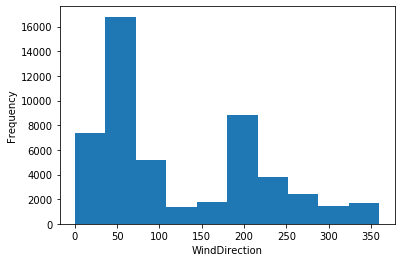

In [15]:
plt.hist(data['WindDirection'])
plt.xlabel("WindDirection")
plt.ylabel("Frequency")
plt.show()

<Figure size 432x288 with 0 Axes>

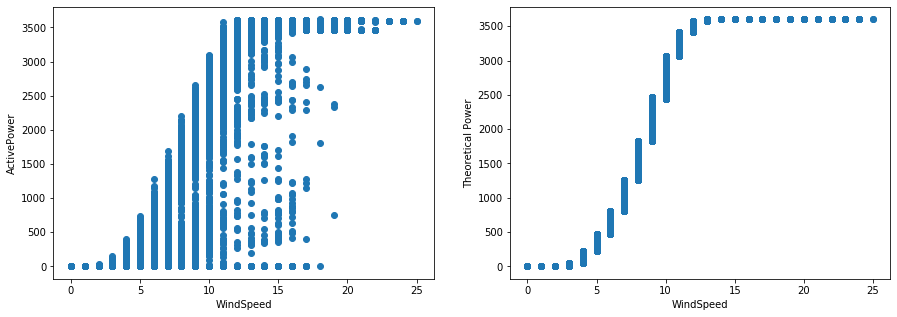

In [16]:
fig = plt.figure()
plt.rcParams["figure.figsize"] = (15,5)
fig,(ax1,ax2) = plt.subplots(nrows = 1,ncols = 2)
ax1.scatter(data['WindSpeed'],data['ActivePower'])
ax1.set_xlabel("WindSpeed")
ax1.set_ylabel("ActivePower")

ax2.scatter(data['WindSpeed'],data['TheoreticalPower'])
ax2.set_xlabel("WindSpeed")
ax2.set_ylabel("Theoretical Power")
plt.show()

fig.savefig("Analysis_Images/WindSpeed_power.png")
#Theoretical Power depends on Wind Speed.

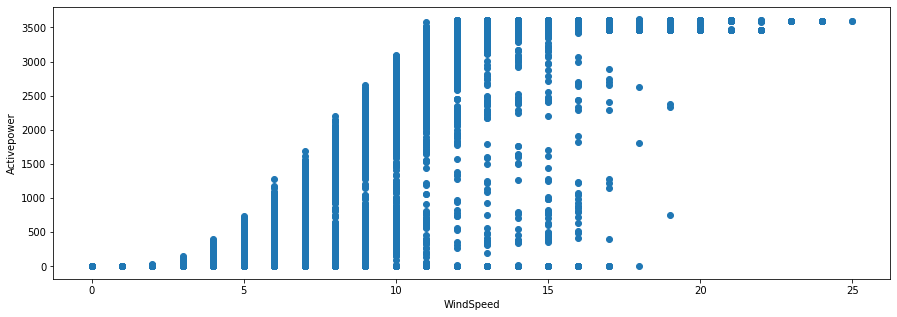

In [17]:
plt.scatter(data['WindSpeed'],data['ActivePower'])
plt.xlabel("WindSpeed")
plt.ylabel("Activepower")
plt.show()
#Active Power not fully depend on wind Speed.

<Figure size 1080x360 with 0 Axes>

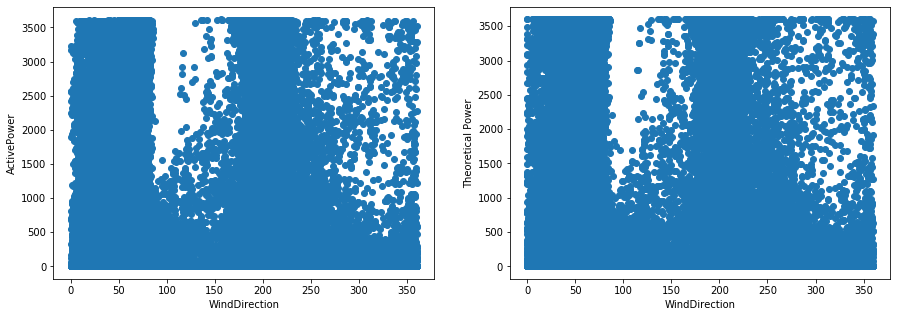

In [18]:
fig = plt.figure()
plt.rcParams["figure.figsize"] = (15,5)
fig,(ax1,ax2) = plt.subplots(nrows = 1,ncols = 2)
ax1.scatter(data['WindDirection'],data['ActivePower'])
ax1.set_xlabel("WindDirection")
ax1.set_ylabel("ActivePower")

ax2.scatter(data['WindDirection'],data['TheoreticalPower'])
ax2.set_xlabel("WindDirection")
ax2.set_ylabel("Theoretical Power")
plt.show()

fig.savefig("Analysis_Images/WindDirection.png")
#Active Power not depend on wind direction

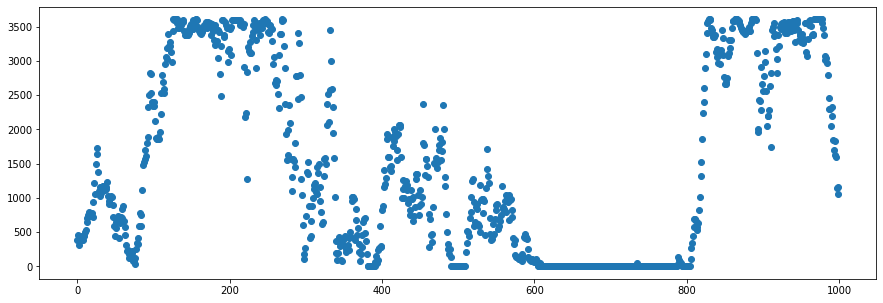

In [19]:
plt.scatter(data['DT'][:1000],data['ActivePower'][:1000])
plt.show()

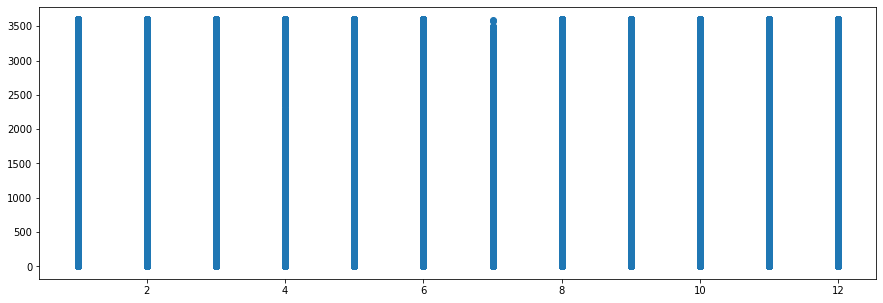

In [20]:
plt.scatter(data['Month'],data['TheoreticalPower'])
plt.show()

In [21]:
total_power = [0,0,0,0,0,0,0,0,0,0,0,0,0,0]
for i in range(len(data['Month'])):
    total_power[data['Month'][i]] = total_power[data['Month'][i]] + data['ActivePower'][i]
print(total_power)
total_power.remove(0)
total_power.remove(0)

[0, 5050464.0, 6061526.0, 8713626.0, 3548847.0, 3723544.0, 4225876.0, 2129364.0, 8753479.0, 5717929.0, 5749954.0, 7169455.0, 5233200.0, 0]


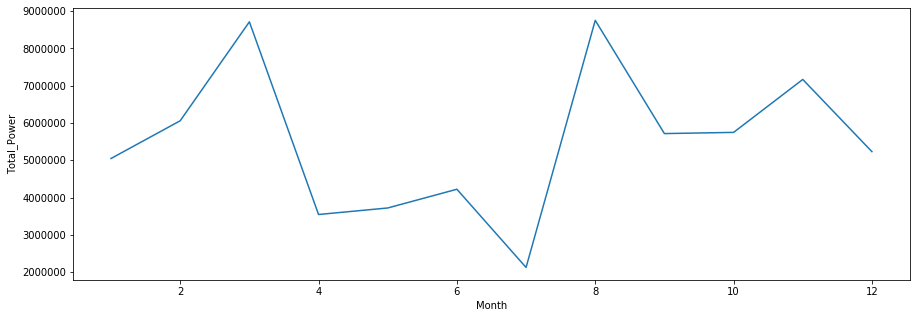

In [22]:
fig = plt.figure()
plt.plot(data['Month'].unique(),total_power)
plt.xlabel('Month')
plt.ylabel("Total_Power")
plt.show()
fig.savefig("Analysis_Images/Month_Wise.png")

# Model Development 

In [46]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers  import Dense, Dropout, LSTM
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [47]:
data = pd.read_csv("data.csv")
print(data.shape)
#renaming columns
data = data.rename({'Date/Time':'Date_Time','LV ActivePower (kW)':'ActivePower','Wind Speed (m/s)':'WindSpeed','Theoretical_Power_Curve (KWh)':'TheoreticalPower','Wind Direction (°)':'WindDirection'},axis=1)
print(data.dtypes)

(50530, 5)
Date_Time            object
ActivePower         float64
WindSpeed           float64
TheoreticalPower    float64
WindDirection       float64
dtype: object


In [48]:
print(data.dtypes)
data.columns

Date_Time            object
ActivePower         float64
WindSpeed           float64
TheoreticalPower    float64
WindDirection       float64
dtype: object


Index(['Date_Time', 'ActivePower', 'WindSpeed', 'TheoreticalPower',
       'WindDirection'],
      dtype='object')

In [49]:
col = ['TheoreticalPower','WindDirection','WindSpeed']
data.drop(col,inplace=True,axis=1)
print(data.dtypes)

Date_Time       object
ActivePower    float64
dtype: object


In [50]:
data['date'] = pd.to_datetime(data.Date_Time)


In [51]:
print(data.dtypes)
data = data.set_index('date')

Date_Time              object
ActivePower           float64
date           datetime64[ns]
dtype: object


In [29]:
col = ['Date_Time']
data.drop(col,inplace=True,axis=1)

In [30]:
data.head()

,ActivePower
date,
2018-01-01 00:00:00,380.047791
2018-01-01 00:10:00,453.769196
2018-01-01 00:20:00,306.376587
2018-01-01 00:30:00,419.645905
2018-01-01 00:40:00,380.650696


In [ ]:
scaler = MinMaxScaler()
scaler.fit(data)
train = scaler.transform(data)

In [ ]:
n_input = 432
n_features = 1

generator = TimeseriesGenerator(train,train,length=n_input,batch_size=6)
model = Sequential()
model.add(LSTM(200 , activation = 'relu',input_shape(n_input,n_features)))
model.add(Dropout(0.15))
model.add(Dense(1))
model.compile(optimzer='adam',loss='mse')
model.fit_generator(generator, epochs=1)

In [ ]:
pred_list = []
batch = train[-n_input:].reshape((1,n_input,n_features))
for i in range(n_input):
    pred_list.append(model.predict(batch)[0])
    batch = np.append(batch[: , 1: , :],[[pred_list[i]]], axis=1)

In [ ]:
df_predict = pd.DataFrame(scaler.inverse_transform(pred_list), index=data[-n_input:].index, columns=['predictions'])
df_test = pd.concat([data,df_predict],axis=1)

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(df_test.index,df_test['ActivePower'])
plt.plot(df_test.index,df_test['predictions'],color='r')
plt.show()

In [ ]:
print(df_test.tail(73))

# For Next Year

In [ ]:
train = data
scaler.fit(train)
train = scaler.transform(train)

In [45]:
n_input = 432
n_features = 1

generator = TimeseriesGenerator(train,train,length=n_input,batch_size=6)
model.fit_generator(generator, epochs=10)
import pickle
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

Epoch 1/10
8350/8350 [==============================] - 9910s 1s/step - loss: nan
Epoch 2/10
2870/8350 [=========>....................] - ETA: 2:13:21 - loss: nan

KeyboardInterrupt: 

In [ ]:
pred_list = []
batch = train[-n_input:].reshape((1,n_input,n_features))
for i in range(n_input):
    pred_list.append(model.predict(batch)[0])
    batch = np.append(batch[: , 1: , :],[[pred_list[i]]], axis=1)

In [ ]:
from pandas.tseries.offsets import DateOffset
add_dates = [data.index[-1] + DateOffset(months=x) for x in range(0,10)]
future_dates = pd.DataFrame(index=add_dates[1:],columns=data.columns)

In [38]:
time_stamp = [0]
for i in range(1,433):
    time_stamp.append(i)

In [40]:
future_dates = pd.DataFrame(index=time_stamp[1:],columns=data.columns)

In [41]:
print(future_dates)

    ActivePower
1           NaN
2           NaN
3           NaN
4           NaN
5           NaN
..          ...
428         NaN
429         NaN
430         NaN
431         NaN
432         NaN

[432 rows x 1 columns]


In [42]:
df_predict = pd.DataFrame(scaler.inverse_transform(pred_list), index=future_dates[-n_input:].index, columns=['predictions'])
df_proj = pd.concat([data,df_predict],axis=1)

NameError: name 'pred_list' is not defined

In [ ]:
print(df_proj.tail())

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(df_proj.index,df_proj['ActivePower'])
plt.plot(df_proj.index,df_proj['predictions'],color='r')
plt.legend(loc="best",fontsize="large")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()